In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X_data = iris.data
Y_data = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.25, random_state = 4)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print(knn.score(X_test, Y_test))

0.9736842105263158


In [3]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X_data, Y_data, cv = 5, scoring = 'accuracy')
print(scores.mean())

0.9733333333333334


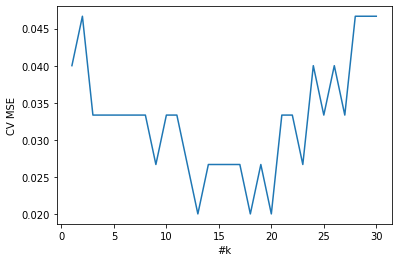

In [5]:
import matplotlib.pyplot as plt
k_range = range(1,31)
k_scores = []
k_loss = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_data, Y_data, cv=10, scoring='accuracy')
    loss = -cross_val_score(knn, X_data, Y_data, cv=10, scoring='neg_mean_squared_error') # for regression
    k_scores.append(scores.mean())
    k_loss.append(loss.mean())
plt.plot(k_range, k_loss)
plt.xlabel('#k')
plt.ylabel('CV MSE')
plt.show()